## Observations and Insights 

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [111]:
# Check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
#multiple_timepoint_id = df[df.duplicated(['Mouse ID'])]
#multiple_timepoint_id

In [112]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [113]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_rows = df[df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

In [114]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [115]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# df.drop(['Mouse ID' == 'g989'])
df = df[df['Mouse ID'] != 'g989']

In [116]:
# Checking the number of mice in the clean DataFrame.
df['Mouse ID'].nunique()

248

## Summary Statistics

In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Create the summary statistics
regimen_mean = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
regimen_median = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
regimen_variance = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimen_sd = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
regimen_sem = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Create a dataframe for the summary statistics
regimen_df = pd.DataFrame({'Mean' : regimen_mean, 'Median' : regimen_median, 'Variance' : regimen_variance, 'Standard Deviation': regimen_sd, 'Standard Error of Mean' : regimen_sem})

regimen_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Timepoints Per Regimen'}, xlabel='Drug Regimen', ylabel='Total Timepoints'>

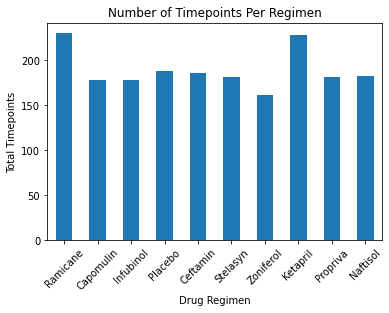

In [119]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoints = df.groupby(['Drug Regimen'])['Timepoint'].count().tolist()
total_regimens = df['Drug Regimen'].unique().tolist()
data = {'Drug Regimen' : ['Ramicane', 'Capomulin','Infubinol','Placebo','Ceftamin','Stelasyn','Zoniferol','Ketapril','Propriva','Naftisol'],
        'Total Timepoints': [230, 178, 178, 188, 186, 181, 161, 228, 181, 182] }
dataFrame = pd.DataFrame(data=data)
dataFrame.plot.bar(x = 'Drug Regimen', ylabel = 'Total Timepoints', rot=45, legend = False, title = "Number of Timepoints Per Regimen")

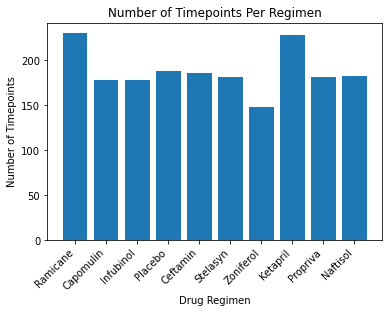

In [120]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
total_timepoints = df.groupby(['Drug Regimen'])['Timepoint'].count().tolist()
total_regimens = df['Drug Regimen'].unique().tolist()
plt.figure()
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Number of Timepoints Per Regimen')
plt.bar(total_regimens,total_timepoints)
plt.show()

<AxesSubplot:title={'center':'Female vs. Male Mice'}, ylabel=' '>

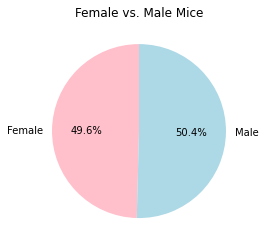

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# female = df.groupby('Sex')['Mouse ID'].nunique()[0]
# male = df.groupby('Sex')['Mouse ID'].nunique()[1]
pie = pd.DataFrame({'Number Per Sex': [123,125]}, index = ['Female', 'Male'])
colors = ['pink', 'lightblue']
pie.plot.pie(y= 'Number Per Sex', colors = colors, autopct = '%1.1f%%', title='Female vs. Male Mice', startangle = 90, legend = False, ylabel = " ")

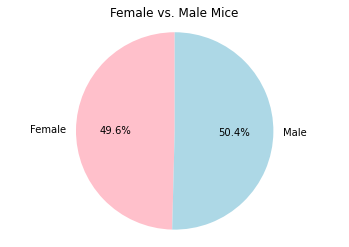

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Female', 'Male'
female = df.groupby('Sex')["Mouse ID"].nunique()[0]
male = df.groupby('Sex')["Mouse ID"].nunique()[1]
sizes = [female,male]
colors = ['pink', 'lightblue']
explode = (0, 0) 
fig1, ax1 = plt.subplots()
ax1.set_title('Female vs. Male Mice')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, colors = colors, )
ax1.axis('equal');


## Quartiles, Outliers and Boxplots

In [123]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens = df[(df["Drug Regimen"] == "Capomulin") | (df["Drug Regimen"] == "Ramicane") | 
              (df["Drug Regimen"] == "Infubinol") | (df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
# four_regimens.groupby('Mouse ID')['Timepoint'].max()
four_regimens = four_regimens.groupby('Mouse ID').last()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [124]:
four_regimens.groupby('Mouse ID').last()['Timepoint'].value_counts()

45    63
30     9
5      6
0      4
15     4
35     4
20     3
25     3
10     2
40     2
Name: Timepoint, dtype: int64

In [125]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = four_regimens['Drug Regimen'].unique().tolist()
treatments

['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

In [126]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

for one_drug in treatments:
    quartiles = four_regimens.loc[four_regimens['Drug Regimen'] == one_drug, 'Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    quartiles

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f'=========={one_drug}==========')
    
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    tumor_volume.append(quartiles)
    
    
    


==========Infubinol==========
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
The the median is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
==========Ceftamin==========
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
The the median is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
==========Ramicane==========
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The the median is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
==========Capomulin==========
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The the median is: 38.125

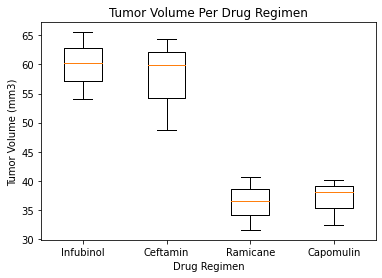

In [127]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Tumor Volume Per Drug Regimen')
ax.boxplot(tumor_volume, labels = ['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'])
plt.show()

## Line and Scatter Plots

<AxesSubplot:title={'center':'Tumor Volume for Mouse f966 on Capomulin'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

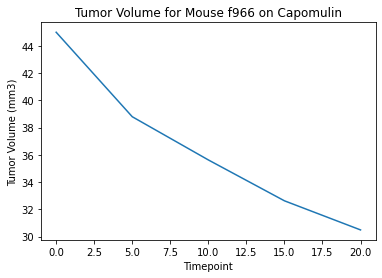

In [128]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_subset = df[(df['Mouse ID'] == 'f966')]
ax.set_title('Tumor Volume for Mouse f966')
capomulin_subset.plot.line('Timepoint', 'Tumor Volume (mm3)', legend = False, ylabel = 'Tumor Volume (mm3)', title = 'Tumor Volume for Mouse f966 on Capomulin')

<AxesSubplot:title={'center':' Weight Vs. Capomulin Tumor Volume '}, xlabel='Weight (g)', ylabel='TUmor Volume (mm3)'>

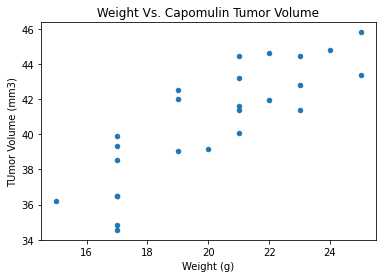

In [129]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_sub = df[(df['Drug Regimen'] == 'Capomulin')]
capomulin_average = capomulin_sub.groupby(['Mouse ID']).mean()
capomulin_average.plot.scatter(  'Weight (g)', 'Tumor Volume (mm3)', legend = False, ylabel = 'TUmor Volume (mm3)', title = ' Weight Vs. Capomulin Tumor Volume ')

## Correlation and Regression

In [130]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen
tumor_volume = capomulin_average.loc[:,'Tumor Volume (mm3)']
mice_weight = capomulin_average.loc[:,'Weight (g)']
correlation = st.pearsonr(mice_weight, tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [131]:
# Calculate the correlation linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

tumor_volume = capomulin_average.loc[:,"Tumor Volume (mm3)"]
mice_weight = capomulin_average.loc[:,"Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(mice_weight, tumor_volume)
regress_values = mice_weight * slope + intercept
print(f"y = {str(round(slope,2))}x + {str(round(intercept,2))}")


y = 0.95x + 21.55


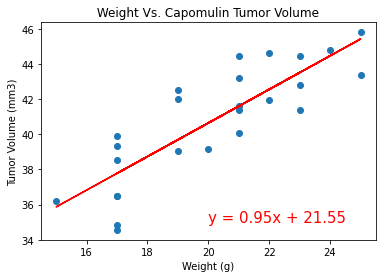

In [132]:
# Plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mice_weight, tumor_volume)
plt.plot(mice_weight,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(' Weight Vs. Capomulin Tumor Volume ')
plt.show()